In [2]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]]
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) 
dataV2_cohortV3

/tmp/ipykernel_70/3077980230.py:3: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,CONNECTION_preference_time_family_grouped,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_neighbours_grouped,LONELY_dejong_emotional_social_loneliness_scale_emptiness,LONELY_dejong_emotional_social_loneliness_scale_rely,LONELY_dejong_emotional_social_loneliness_scale_trust,LONELY_dejong_emotional_social_loneliness_scale_close,LONELY_dejong_emotional_social_loneliness_scale_miss,LONELY_dejong_emotional_social_loneliness_scale_rejected,LONELY_direct,LONELY_change_pre_covid,LONELY_others_aware,PSYCH_zimet_multidimensional_social_support_scale_need,PSYCH_zimet_multidimensional_social_support_scale_joys,PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored,PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_comfort,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_feelings,PSYCH_zimet_multidimensional_social_support_scale_decisions,WELLNESS_self_rated_physical_health,WELLNESS_self_rated_me

**Analysis 1**:

•	Research question: 
Is there a relationship between the simple act of greeting neighbors or strangers and reported loneliness score among participants?
Population parameter - average loneliness score among people who did and didn’t          greet neighbors or strangers.

•	Variables I plan to explore:
CONNECTION_activities_greeted_neighbour_or_stranger_p3m
LONELY_ucla_loneliness_scale_score
I used a box plot and a heat map to visualize the data. 
A heat map gives a good visual representations of the values and the magnitude of the relationship with higher intensity colors like red. This allows for better comparison.
A box pot was used for better comparison between the different categories of peoples level of interaction/greeting frequency. This shows differences between medians, ranges and outliers in my data very well.
      
•	Analysis I plan to perform: 
The analysis will assess if individuals who frequently greet others report lower loneliness scores compared to those who do not engage in such activities with the use of a permutation test. 
Null Hypothesis (H_0): There is no difference in loneliness scores between participants who greet others and those who do not.
Alternative Hypothesis (H_1): There is a difference in loneliness scores between participants who greet others and those who do not.
I will separate the CONNECTION_activities_greeted_neighbour_or_stranger_p3m variable into 2 groups, ‘Group_greeted’ and ‘Group_not_greeted’. 
Then I will carry out my test with a ten thousand number of permutations. Then the mean loneliness score is calculated for both groups which is used to get observed mean difference.
Now for the permutation test itself the loneliness scores from both groups are combined and shuffled 10,000 permutations to create a  distribution of loneliness between the 2 groups. Next the mean difference is calculated for each permutations and the number of times the absolute value of this difference is as extreme as or more extreme than the observed mean difference is computed. 
This computed proportion is the p-value. Based on this p-value, either the null hypothesis is either rejected or failed to reject. 
Main assumptions in the analysis were that this dataset was random sample for the population and is independent. With the use of the permutation test we also had no assumptions about the distribution.

•	Possible results of the analysis:
The results from this test were as follows: The negative mean observed difference indicates that on average, participants in the ‘greeted’ group reported lower loneliness scores compared to those in the ‘not greeted” group. The p-value from the permutation was 0 and is significantly lower than 0.001, therefore we have very strong evidence against null hypothesis and can reject it. These findings show the importance of social interactions, even those as simple as greeting reduces the feeling of loneliness.


/tmp/ipykernel_70/4036526939.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data_plot.groupby(['CONNECTION_activities_greeted_neighbour_or_stranger_p3m', 'LONELY_ucla_loneliness_scale_score']).size().unstack(fill_value=0)


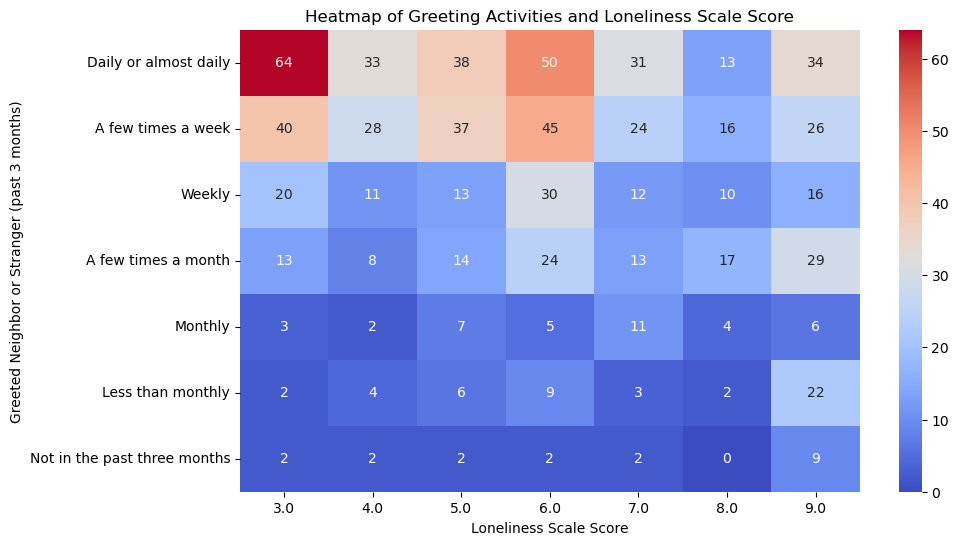

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the desired order for the greeting frequency
greeting_order = [
    "Daily or almost daily",
    "A few times a week",
    "Weekly",
    "A few times a month",
    "Monthly",
    "Less than monthly",
    "Not in the past three months"
]

# Drop rows with NaN values in the specified columns
data_plot = dataV2_cohortV3[['CONNECTION_activities_greeted_neighbour_or_stranger_p3m', 'LONELY_ucla_loneliness_scale_score']].dropna()

# Convert the greeting column to a categorical type with the specified order
data_plot['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'] = pd.Categorical(
    data_plot['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'],
    categories=greeting_order,
    ordered=True
)

# Get counts for each combination of the two categorical variables
count_data = data_plot.groupby(['CONNECTION_activities_greeted_neighbour_or_stranger_p3m', 'LONELY_ucla_loneliness_scale_score']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)

# Adding title and labels
plt.title("Heatmap of Greeting Activities and Loneliness Scale Score")
plt.xlabel("Loneliness Scale Score")
plt.ylabel("Greeted Neighbor or Stranger (past 3 months)")

plt.show()

/tmp/ipykernel_70/2102683529.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


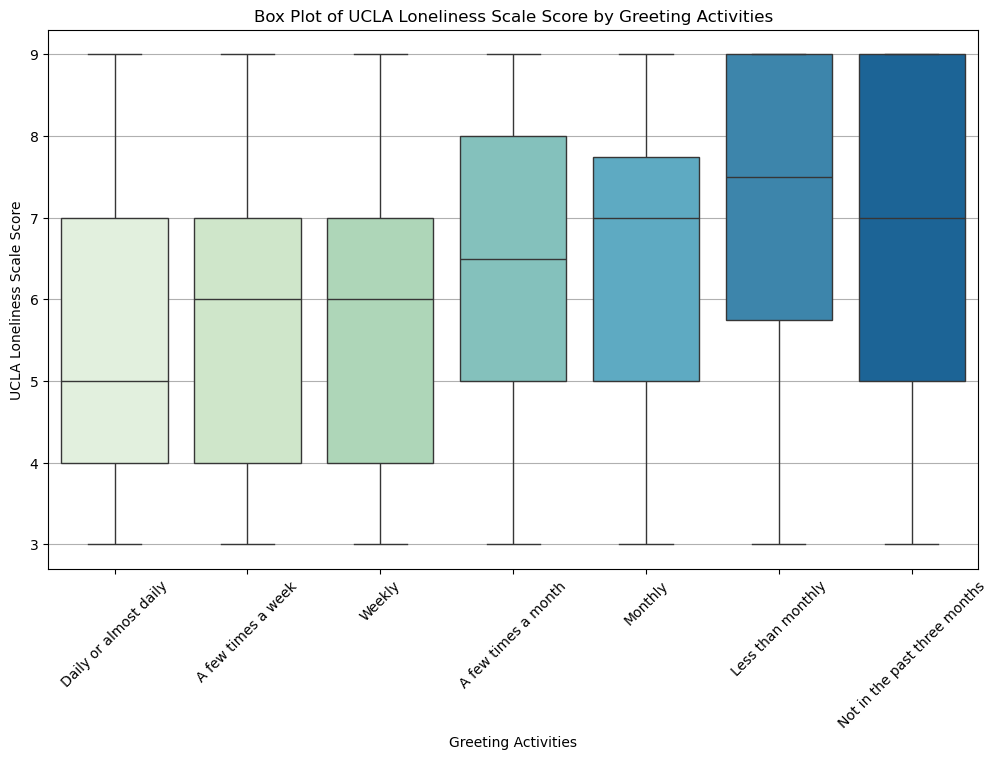

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing loneliness scores
dataV2_cohortV3.dropna(subset=['LONELY_ucla_loneliness_scale_score'], inplace=True)

# Define the order for greeting categories
greeting_order = [
    "Daily or almost daily",
    "A few times a week",
    "Weekly",
    "A few times a month",
    "Monthly",
    "Less than monthly",
    "Not in the past three months"
]

# Convert to categorical type with specified order
dataV2_cohortV3['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'] = pd.Categorical(
    dataV2_cohortV3['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'],
    categories=greeting_order,
    ordered=True
)

# Generate a gradient color palette from green to blue
cmap = sns.color_palette("GnBu", len(greeting_order))  # "GnBu" is a green-to-blue gradient palette

# Set the plot size
plt.figure(figsize=(12, 7))

# Create the box plot with the green-to-blue gradient color palette
sns.boxplot(
    x='CONNECTION_activities_greeted_neighbour_or_stranger_p3m',
    y='LONELY_ucla_loneliness_scale_score',
    data=dataV2_cohortV3,
    palette=cmap  # Apply the green-to-blue gradient color palette
)

# Set plot labels and title
plt.xlabel('Greeting Activities')
plt.ylabel('UCLA Loneliness Scale Score')
plt.title('Box Plot of UCLA Loneliness Scale Score by Greeting Activities')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [32]:
import pandas as pd
import numpy as np

# Define the greeted and not greeted groups based on specified criteria
greeted_responses = [
    'Daily or almost daily', 
    'A few times a week', 
    'Weekly', 
    'A few times a month'
]
dataV2_cohortV3['Greeting_Group'] = np.where(
    dataV2_cohortV3['CONNECTION_activities_greeted_neighbour_or_stranger_p3m'].isin(greeted_responses), 
    'Greeted', 
    'Not Greeted'
)

# Separate the groups
group_greeted = dataV2_cohortV3[dataV2_cohortV3['Greeting_Group'] == 'Greeted']['LONELY_ucla_loneliness_scale_score'].dropna()
group_not_greeted = dataV2_cohortV3[dataV2_cohortV3['Greeting_Group'] == 'Not Greeted']['LONELY_ucla_loneliness_scale_score'].dropna()

# Calculate the observed test statistic (mean difference)
observed_diff = group_greeted.mean() - group_not_greeted.mean()

# Combine both groups for permutation testing
combined = np.concatenate([group_greeted, group_not_greeted])
n_greeted = len(group_greeted)
n_not_greeted = len(group_not_greeted)

# Perform permutation test
n_permutations = 10000
count_extreme = 0

for _ in range(n_permutations):
    np.random.shuffle(combined)  # Shuffle the combined data
    new_group_greeted = combined[:n_greeted]
    new_group_not_greeted = combined[n_greeted:]
    new_diff = new_group_greeted.mean() - new_group_not_greeted.mean()
    
    # Check if the new mean difference is as extreme as the observed difference
    if abs(new_diff) >= abs(observed_diff):
        count_extreme += 1

# Calculate the p-value
p_value = count_extreme / n_permutations

# Output results
print(f"Observed mean difference: {observed_diff:.4f}")
print(f"P-value from permutation test: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between greeting activities and loneliness scores.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Observed mean difference: -1.0549
P-value from permutation test: 0.0000
Reject the null hypothesis: There is a significant association between greeting activities and loneliness scores.


**Analysis 2**:

•	Research question: 
How does the amount of social time spent with friends influence mental health outcomes, specifically burnout levels? Or do extroverts have better mental health?Population Parameter of Interest: You might want to estimate the mean burnout score among participants and how it varies across different levels of social connection.

•	Variables I plan to explore:
WELLNESS_malach_pines_burnout_measure_score – quantifies the burnout levels among participants using the Malach Pines Burnout Measure. Burnout is a very aspect of a individual’s mental heath and well-being
CONNECTION_social_time_friends_p7d_grouped – amount of social time each participant spent with friends.
I’ve used a box plot to visually represent the distribution of the burnout scores and this way I can clearly compare medians, quartiles and outliers among the different social connection groups. It shows the variability among burnout scores so I can identify any patterns of how social time relate to burnout levels.
I’ve also used a violin plot for insight on the distribution of burnout scores with which I can identify any modality in the groups. 

•	Analysis I plan to perform: I plan to perform a F-statistic test, specifically an ANOVA test. This way I can compare means amoung different groups of independent variables and determine whether there are statiscally significant differences in the dependant variable. 
Null Hypothesis (H_0) - There is no significant difference in burnout levels across different groups of social times spent with friends.
Alternate Hypothesis (H_1) – There is a significant difference in burnout levels across different groups of social time spent wit friends. 
Main assumptions in the analysis were that this dataset is independent. 

•	Possible results of the analysis:
With the F-statistics of 10.2858 and p-value of 0.000, we can reject the null hypothesis. This shows that statistically there is a significant difference in burnout levels among particpants who spent difernt aounst of time with friends. The very low p-value indicates that the difference is burnout scores highly unlikely due to random choice.
These results suggests that having social connections can be important when trying to reduce burnouts and intern would lead to better mental helath. Programs that encorange social activities and community building might be benefitial.

/tmp/ipykernel_71/533689955.py:8: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
/tmp/ipykernel_71/533689955.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CONNECTION_social_time_friends_p7d_grouped',


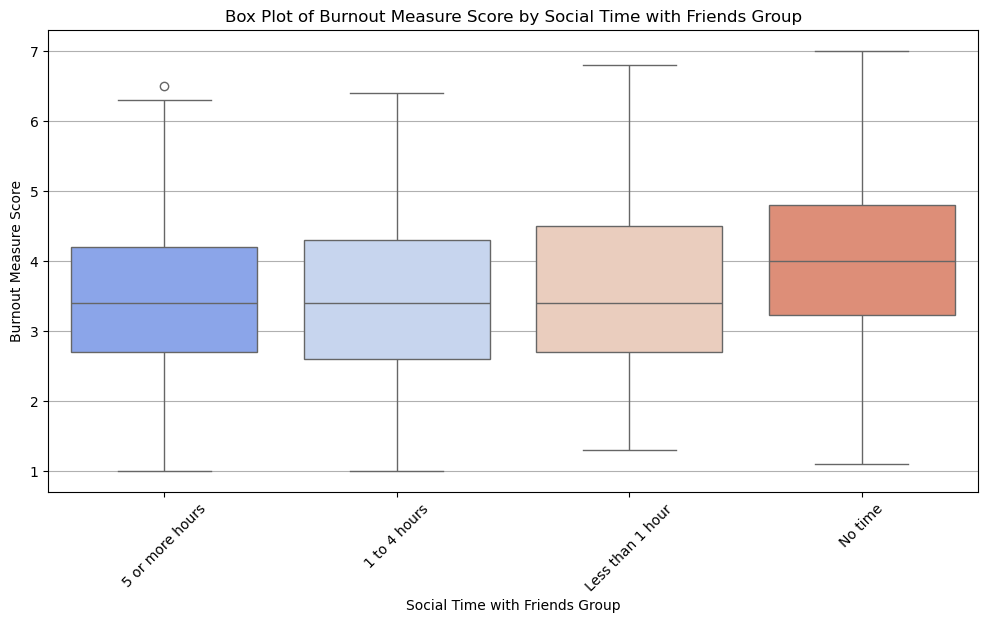

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Clean and filter your data
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]
dataV2 = data[data.REMOVE_case == 'No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()
missingness_limit = 100
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

# Ensure relevant columns are numeric (if they are not already)
dataV2_cohortV3['WELLNESS_malach_pines_burnout_measure_score'] = pd.to_numeric(dataV2_cohortV3['WELLNESS_malach_pines_burnout_measure_score'], errors='coerce')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='CONNECTION_social_time_friends_p7d_grouped', 
            y='WELLNESS_malach_pines_burnout_measure_score', 
            data=dataV2_cohortV3, 
            palette='coolwarm')

plt.title('Box Plot of Burnout Measure Score by Social Time with Friends Group')
plt.xlabel('Social Time with Friends Group')
plt.ylabel('Burnout Measure Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/tmp/ipykernel_70/3487218139.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='CONNECTION_social_time_friends_p7d_grouped',


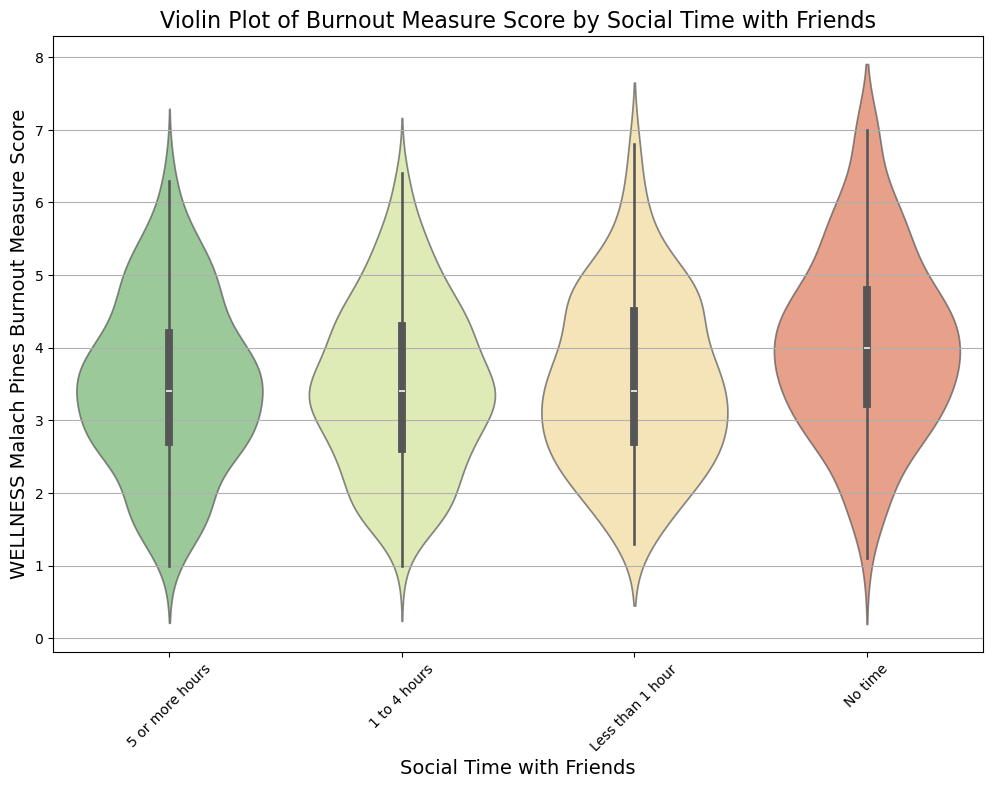

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with NaN in the relevant columns
dataV2_cohortV3 = dataV2_cohortV3.dropna(subset=['WELLNESS_malach_pines_burnout_measure_score', 
                                                   'CONNECTION_social_time_friends_p7d_grouped'])

# Set the plot size
plt.figure(figsize=(12, 8))

# Create a reversed color palette for the violin plot (from green to red)
palette = sns.color_palette("RdYlGn_r", len(dataV2_cohortV3['CONNECTION_social_time_friends_p7d_grouped'].unique()))

# Create a violin plot with the reversed gradient color and transparency
sns.violinplot(x='CONNECTION_social_time_friends_p7d_grouped', 
               y='WELLNESS_malach_pines_burnout_measure_score', 
               data=dataV2_cohortV3, 
               palette=palette,  # Use the reversed gradient colors
               alpha=0.7)  # Slight transparency

# Set plot titles and labels
plt.title('Violin Plot of Burnout Measure Score by Social Time with Friends', fontsize=16)
plt.xlabel('Social Time with Friends', fontsize=14)
plt.ylabel('WELLNESS Malach Pines Burnout Measure Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [73]:
import pandas as pd
import scipy.stats as stats

# Load your data
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Clean and filter your data
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]
dataV2 = data[data.REMOVE_case == 'No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()
missingness_limit = 100  # This retains columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

# Drop rows with NaN in the relevant columns
dataV2_cohortV3 = dataV2_cohortV3.dropna(subset=['WELLNESS_malach_pines_burnout_measure_score', 
                                                   'CONNECTION_social_time_friends_p7d_grouped'])

# Perform ANOVA
anova_results = stats.f_oneway(
    *[group['WELLNESS_malach_pines_burnout_measure_score'].values for name, group in 
      dataV2_cohortV3.groupby('CONNECTION_social_time_friends_p7d_grouped')]
)

# Output the results
f_statistic = anova_results.statistic
p_value = anova_results.pvalue

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in burnout scores across social time categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in burnout scores across social time categories.")

/tmp/ipykernel_71/2098002179.py:6: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


F-statistic: 10.2858
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in burnout scores across social time categories.


**Analysis 3**: 

•	Research question: 
What is the relationship between perceived social support and self-reported happiness among participants in this dataset?
I could estimate the correlation coefficient between these two variables to understand how changes in social support are associated with changes in happiness.

•	Variables I plan to explore:
WELLNESS_subjective_happiness_scale_happy – is the participant’s subjective happiness level.
PSYCH_zimet_multidimensional_social_support_scale_score – is the level of perceived social support individuals feel they have.  
I used a box plot to visualize and compare median, quarties and outliers between groups. This also helps in visulating the spread or skewness(if any) in the data. 
I also used a ridgeline plot to vbetter vizualise the distribution of social support across different levels of happiness simultanioulsy. This clearly represents how support varies with the happiness category and gives insight on trends.

•	Analysis I plan to perform:
The analysis I would like to perform is a chi-squared test of independence. It evaluates whther there is a significant association between the 2 variables. This test will determine if changes in the level of happiness are related to the varying perceptions of social support. 
Null Hypothesis (H0): There is no significant association between the levels of happiness (WELLNESS_subjective_happiness_scale_happy) and social support scores (PSYCH_zimet_multidimensional_social_support_scale_score).
Alternative Hypothesis (H1): There is a significant association between the levels of happiness and social support scores.

•	Possible results of the analysis:
The results from the chi-squared test were as follows: 
Chi-square Statistic: 818.779387754661
P-value: 5.579766139579474e-28 
Degrees of Freedom: 420

The extremely low p-vaue indicates that we have strong enough evidence to reject the null hypothesis. Therefore, there is significant association between the happniess levels and perceived social support in individuals.  The large chi-squared statistic of 818.78 gives evidence against the null hypothesis too. It indicates that there is a significant difference between the observed frequencies and the expected frequencies. This suggests that social support does have an association wth happiness levels. To further unpack this question we can access how different types of social support relate to happiness levels. 

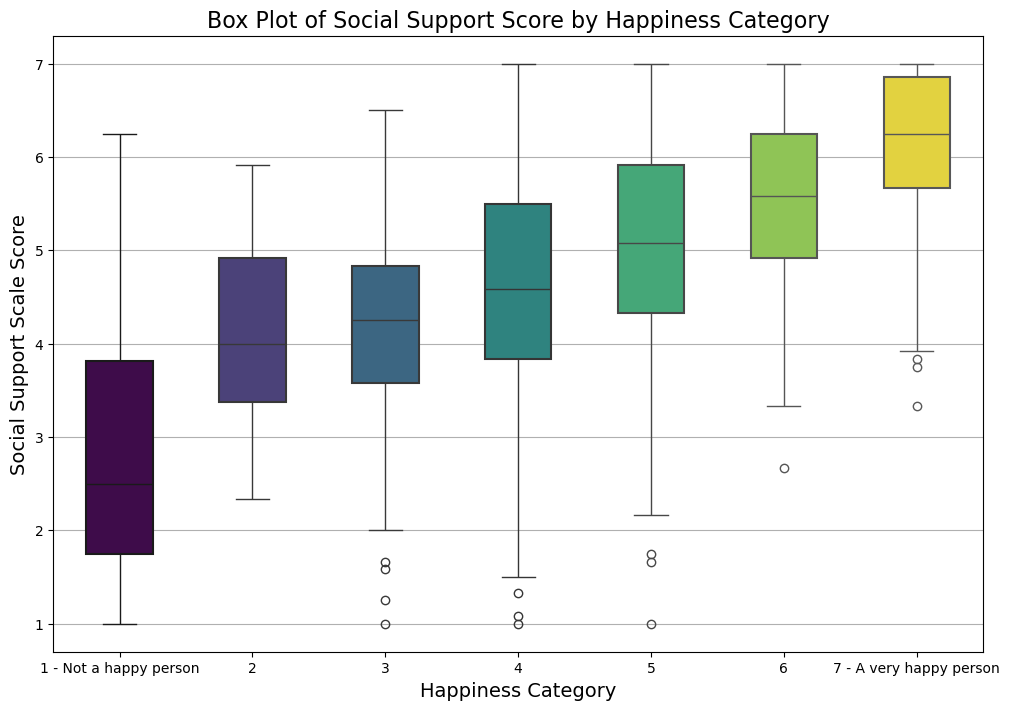

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop rows with NaN in the relevant columns
dataV2_cohortV3 = dataV2_cohortV3.dropna(subset=['PSYCH_zimet_multidimensional_social_support_scale_score', 
                                                   'WELLNESS_subjective_happiness_scale_happy'])

# Ensure happiness scale is treated as categorical
dataV2_cohortV3['Happiness_Category'] = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].astype('category')

# Set the plot size
plt.figure(figsize=(12, 8))

# Get a colormap (for example, 'viridis' or any other of your choice)
cmap = plt.get_cmap('viridis', len(dataV2_cohortV3['Happiness_Category'].cat.categories))

# Create a box plot with a gradient effect
# Use the category labels to loop through and assign colors
for i, category in enumerate(dataV2_cohortV3['Happiness_Category'].cat.categories):
    # Create a boxplot for each category with a specific color from the colormap
    sns.boxplot(
        x='Happiness_Category', 
        y='PSYCH_zimet_multidimensional_social_support_scale_score', 
        data=dataV2_cohortV3[dataV2_cohortV3['Happiness_Category'] == category],
        color=cmap(i),  # Use color from the colormap
        width=0.5,  # Control the width of the boxes
        boxprops=dict(linewidth=1.5)
    )

# Set the positions of x-ticks to the category labels
plt.xticks(ticks=np.arange(len(dataV2_cohortV3['Happiness_Category'].cat.categories)), 
           labels=dataV2_cohortV3['Happiness_Category'].cat.categories)

# Set plot titles and labels
plt.title('Box Plot of Social Support Score by Happiness Category', fontsize=16)
plt.xlabel('Happiness Category', fontsize=14)
plt.ylabel('Social Support Scale Score', fontsize=14)
plt.grid(axis='y')

# Show the plot
plt.show()

/tmp/ipykernel_70/3671980085.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm', len(dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].cat.categories))
/opt/conda/lib/python3.11/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1000x800 with 0 Axes>

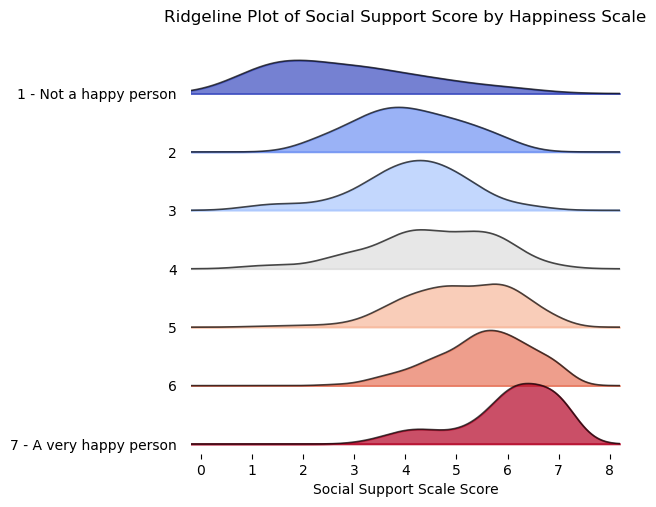

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot
from matplotlib import cm

# Load and preprocess your data (assuming dataV2_cohortV3 is your DataFrame)
dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'] = pd.Categorical(
    dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'], 
    ordered=True
)

# Create the ridgeline plot
plt.figure(figsize=(10, 8))

# Use the 'coolwarm' colormap from Matplotlib
colormap = cm.get_cmap('coolwarm', len(dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].cat.categories))

# Create the ridgeline plot with adjusted overlap
joyplot(
    data=dataV2_cohortV3, 
    by='WELLNESS_subjective_happiness_scale_happy', 
    column='PSYCH_zimet_multidimensional_social_support_scale_score', 
    fill=True, 
    colormap=colormap, 
    linewidth=1.2, 
    alpha=0.7,
    overlap=0.25  # Decrease overlap to increase distance between ridgelines
)

# Add labels and title
plt.xlabel("Social Support Scale Score")
plt.title("Ridgeline Plot of Social Support Score by Happiness Scale")
plt.show()

In [59]:
import pandas as pd
from scipy.stats import chi2_contingency

# Drop rows with NaN in relevant columns
dataV2_cohortV3 = dataV2_cohortV3.dropna(subset=['WELLNESS_subjective_happiness_scale_happy', 
                                                   'PSYCH_zimet_multidimensional_social_support_scale_score'])

# Create a contingency table
# Assuming PSYCH_zimet_multidimensional_social_support_scale_score is also categorical or can be treated as such
contingency_table = pd.crosstab(dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'], 
                                 dataV2_cohortV3['PSYCH_zimet_multidimensional_social_support_scale_score'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

Chi-square Statistic: 818.779387754661
P-value: 5.579766139579474e-28
Degrees of Freedom: 420
